In [1]:

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sbn

import argparse
from datetime import datetime

import sys 
import uuid
import os

In [15]:
run_res = pd.read_csv('../output/experiment_run_results.csv')
run_res.head()

,accuracy(train),pc1_var,pc2_var,kmeans_inertia,res_line,sens_line,drug,nclus,resample_sz,load,run_id,cell_line,drug_check
0,0.857143,0.608820,0.220982,4.360744,T798I,WT,neratinib,5,125,normalized,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
1,0.892857,0.484066,0.186073,2.229742,T798I,WT,neratinib,10,75,normalized,0512f156-ea3c-41dd-b354-d2293a6862b0,EFM192A,NERATINIB
2,0.857143,0.489851,0.185434,3.025715,T798I,WT,neratinib,10,100,raw,0518524d-4448-4e49-9f5d-4603819d66d7,EFM192A,NERATINIB
3,0.857143,0.409117,0.169408,3.971826,T798I,WT,neratinib,20,150,normalized,06163034-1b08-4562-bc89-7e760ac49776,EFM192A,NERATINIB
4,0.785714,0.596230,0.225072,5.434972,T798I,WT,neratinib,5,150,raw,06a065f1-6be4-48cd-8684-5e7c591bf191,EFM192A,NERATINIB


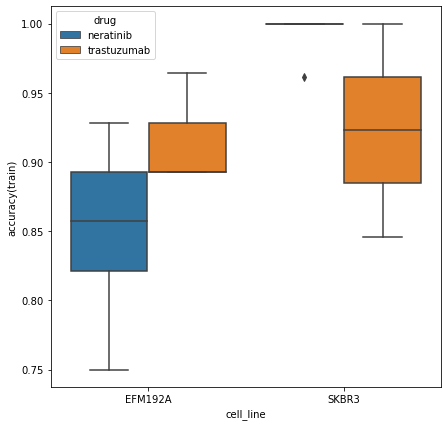

In [19]:
plt.figure(figsize=(7,7))
sbn.boxplot(x='cell_line', y='accuracy(train)', hue='drug', data=run_res)
plt.show()

/home/teddy/miniconda3/envs/lc_reporter/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/teddy/miniconda3/envs/lc_reporter/lib/python3.9/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


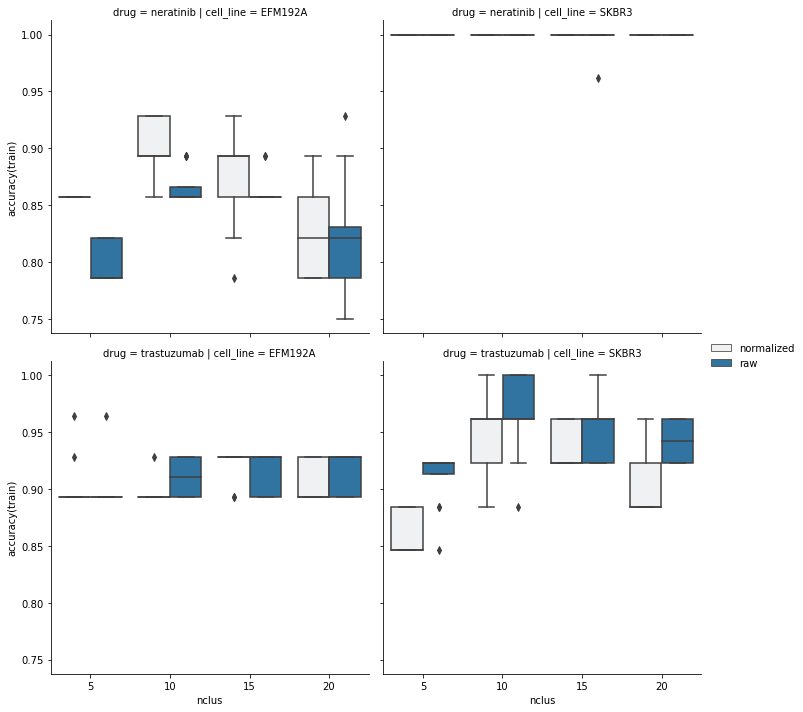

In [37]:
g = sbn.FacetGrid(run_res, col='cell_line', row='drug', height=5, aspect=1)
g.map(sbn.boxplot, 'nclus', 'accuracy(train)', 'load')
plt.tight_layout()
g.add_legend()
plt.show()

In [38]:
prob_res = pd.read_csv('../output/mutant_resistance_results.csv')
prob_res.head()

,pc1,pc2,treatment,mutant,prob_res,prob_sens,call,run_id,cell_line,drug_check
0,0.530627,0.128556,neratinib,A1160V,0.060780,0.939220,sens,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
1,0.101319,-0.300863,neratinib,A355QFS76,0.967054,0.032946,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
2,0.132074,-0.057700,neratinib,A37T,0.752246,0.247754,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
3,0.232511,-0.194930,neratinib,D639E,0.852123,0.147877,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
4,0.049336,-0.320065,neratinib,G778P780DUP,0.979082,0.020918,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB


In [39]:
prob_res.shape

(49920, 10)

<Figure size 720x720 with 0 Axes>

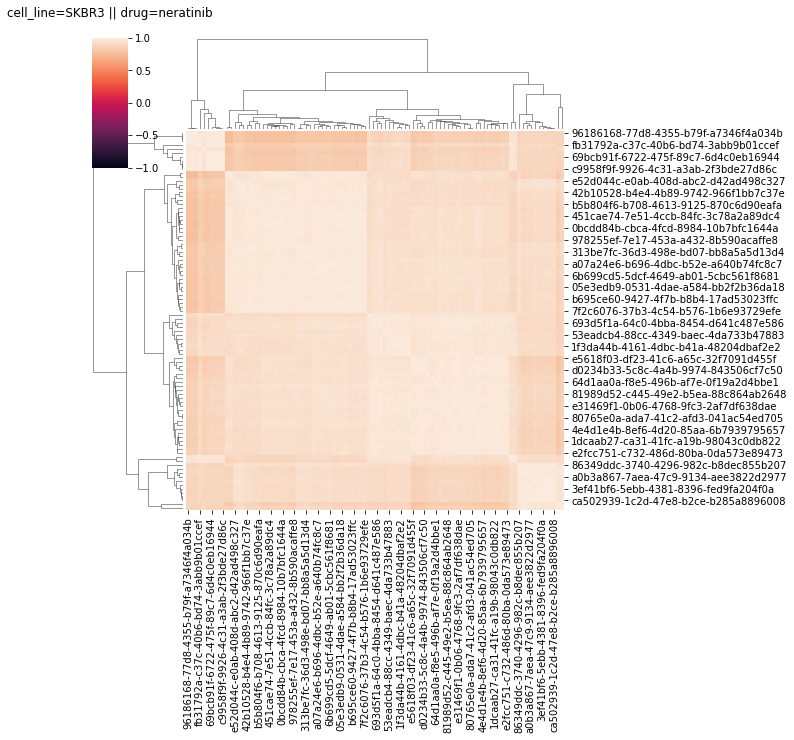

<Figure size 720x720 with 0 Axes>

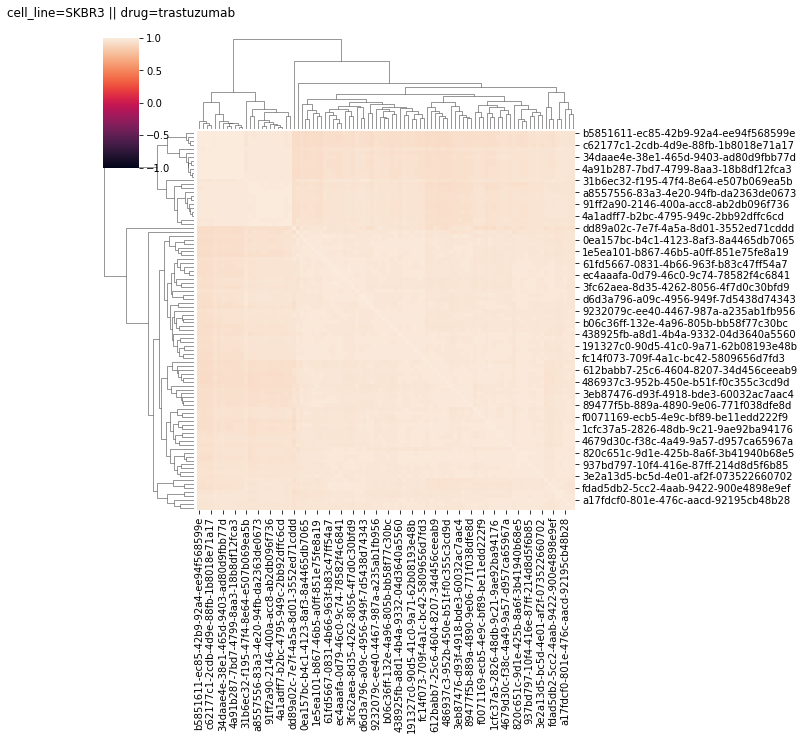

<Figure size 720x720 with 0 Axes>

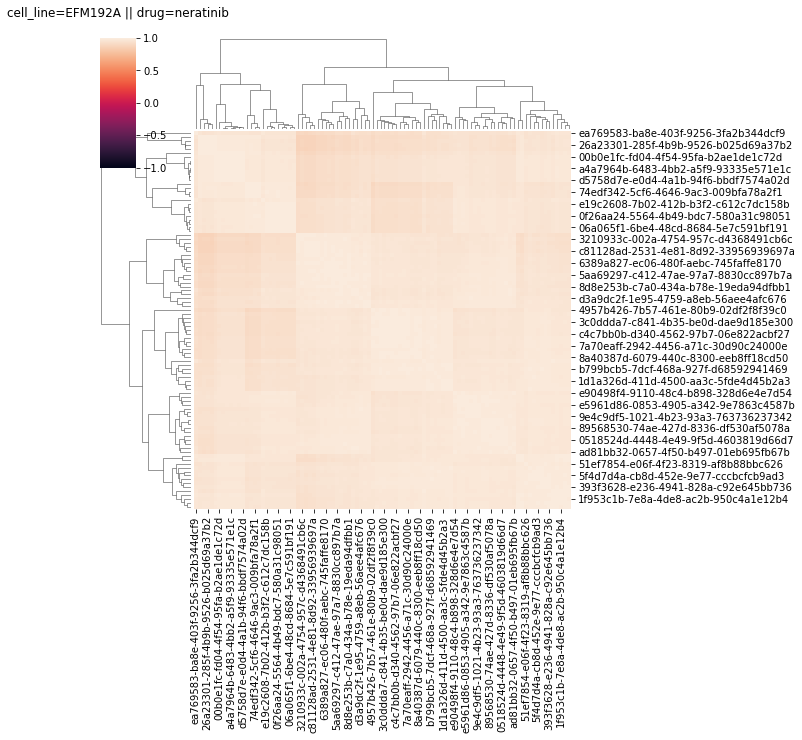

<Figure size 720x720 with 0 Axes>

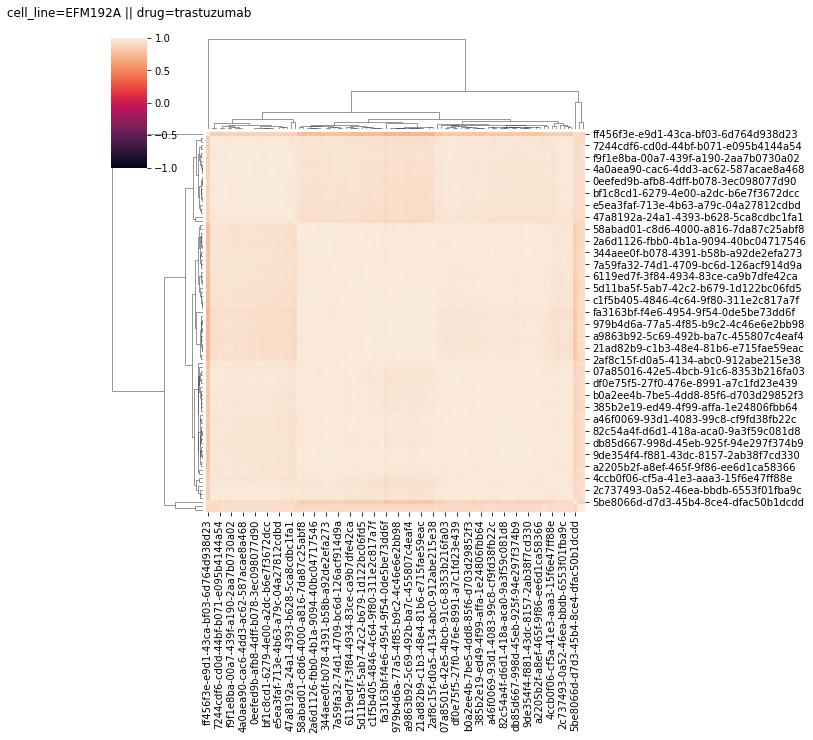

In [58]:
def plot_cross_exp_corr(line, drug): 
    _res = {}
    prob_res2 = prob_res[lambda x: (x.cell_line == line) & (x.treatment == drug)]
    for exp in prob_res2.run_id.unique(): 
        temp = prob_res2[lambda x: x.run_id == exp]
        _res[exp] = temp.prob_res.values

    _res = pd.DataFrame(_res)
    cm = _res.corr()

    plt.figure(figsize=(10,10))
    sbn.clustermap(cm, vmin=-1, vmax=1)
    plt.title(f'cell_line={line} || drug={drug}\n')
    plt.show()

plot_cross_exp_corr(line='SKBR3', drug='neratinib')
plot_cross_exp_corr(line='SKBR3', drug='trastuzumab')
plot_cross_exp_corr(line='EFM192A', drug='neratinib')
plot_cross_exp_corr(line='EFM192A', drug='trastuzumab')



In [59]:
prob_res.head()

,pc1,pc2,treatment,mutant,prob_res,prob_sens,call,run_id,cell_line,drug_check
0,0.530627,0.128556,neratinib,A1160V,0.060780,0.939220,sens,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
1,0.101319,-0.300863,neratinib,A355QFS76,0.967054,0.032946,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
2,0.132074,-0.057700,neratinib,A37T,0.752246,0.247754,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
3,0.232511,-0.194930,neratinib,D639E,0.852123,0.147877,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB
4,0.049336,-0.320065,neratinib,G778P780DUP,0.979082,0.020918,res,00b0e1fc-fd04-4f54-95fa-b2ae1de1c72d,EFM192A,NERATINIB


In [70]:
res = prob_res[['treatment', 'cell_line', 'mutant', 'prob_res']].groupby(['treatment', 'cell_line', 'mutant']).agg(['min', 'max', 'mean', 'std']).sort_values([('prob_res', 'mean')], ascending=False).reset_index()
res.head()

treatment cell_line          mutant  prob_res                      \
                                               min       max      mean   
0  trastuzumab     SKBR3  G778S779INSLPS  0.987118  0.999978  0.998918   
1  trastuzumab     SKBR3           E939G  0.985050  0.999937  0.998543   
2  trastuzumab     SKBR3           E717K  0.983131  0.999898  0.997850   
3  trastuzumab     SKBR3           L869R  0.979358  0.999939  0.997431   
4  trastuzumab     SKBR3           D769Y  0.979665  0.999783  0.996694   

             
        std  
0  0.002088  
1  0.002303  
2  0.002582  
3  0.003537  
4  0.003506

In [76]:
skbr3_mutants = set(res[lambda x: (x.treatment == 'neratinib') & (x.cell_line == 'EFM192A')].mutant.values)
print(len(skbr3_mutants))
efm192a_mutants = set(res[lambda x: (x.treatment == 'neratinib') & (x.cell_line == 'SKBR3')].mutant.values)
print(len(efm192a_mutants))
overlap = skbr3_mutants.intersection(efm192a_mutants)
diff = skbr3_mutants.difference(efm192a_mutants)
print(diff)
len(overlap)

74
82
{'R929W', 'Y772V773INSRDGE', 'G778P780DUP', 'Y772A775DUP'}


70

   mutant  Probabity Resistant (EFM192A)  Probability Resistant (SKBR3)
0     NaN                            NaN                            NaN
1     NaN                            NaN                            NaN
2     NaN                            NaN                            NaN
3     NaN                            NaN                            NaN
4     NaN                            NaN                            NaN
..    ...                            ...                            ...
81    NaN                            NaN                            NaN
82    NaN                            NaN                            NaN
83    NaN                            NaN                            NaN
84    NaN                            NaN                            NaN
85    NaN                            NaN                            NaN

[86 rows x 3 columns]


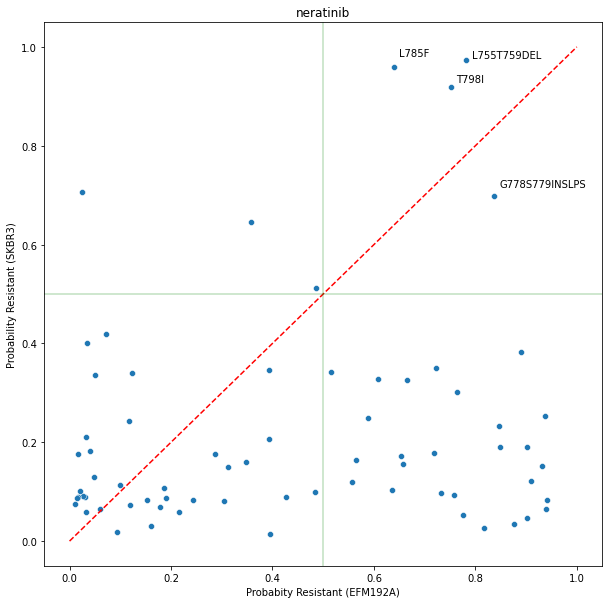

   mutant  Probabity Resistant (EFM192A)  Probability Resistant (SKBR3)
0     NaN                            NaN                            NaN
1     NaN                            NaN                            NaN
2     NaN                            NaN                            NaN
3     NaN                            NaN                            NaN
4     NaN                            NaN                            NaN
..    ...                            ...                            ...
81    NaN                            NaN                            NaN
82    NaN                            NaN                            NaN
83    NaN                            NaN                            NaN
84    NaN                            NaN                            NaN
85    NaN                            NaN                            NaN

[86 rows x 3 columns]


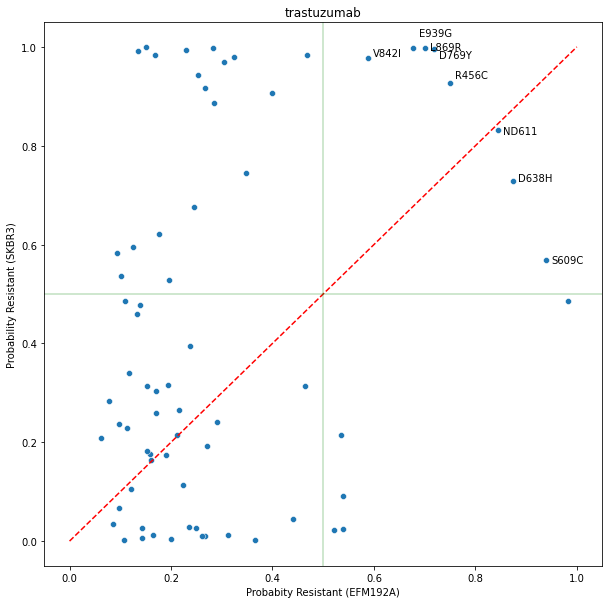

In [137]:
def plot_cross_line_mutant_resistance(res, drug, seed=0): 
    np.random.seed(seed)

    x = res[lambda x: (x.treatment == drug) & (x.cell_line == 'EFM192A')].set_index('mutant')[('prob_res', 'mean')]
    y = res[lambda x: (x.treatment == drug) & (x.cell_line == 'SKBR3')].set_index('mutant')[('prob_res', 'mean')]
    x.name = 'Probabity Resistant (EFM192A)'
    y.name = 'Probability Resistant (SKBR3)'

    df = pd.concat([x,y], axis=1).reset_index()
    print(df[lambda x: x.isna()])

    plt.figure(figsize=(10,10))
    ax = sbn.scatterplot(x=x.name, y=y.name, data=df)
    plt.title(drug)
    plt.plot([0,1],[0,1], 'r--')
    plt.axvline(0.5,c='g', alpha=0.25)
    plt.axhline(0.5, c='g', alpha=0.25)


    for i, point in df.iterrows():
        if (point[x.name] is not None) and (point[y.name]) and (point[x.name] > 0.5) and (point[y.name] > 0.5): 
            ax.text(point[x.name]+.01, point[y.name] + np.random.randn(1)*.01, str(point['mutant']))

    plt.show()

plot_cross_line_mutant_resistance(res, 'neratinib',seed=0)
plot_cross_line_mutant_resistance(res, 'trastuzumab', seed=40)

In [98]:
res

treatment cell_line          mutant      prob_res                      \
                                                     min       max      mean   
0    trastuzumab     SKBR3  G778S779INSLPS  9.871177e-01  0.999978  0.998918   
1    trastuzumab     SKBR3           E939G  9.850498e-01  0.999937  0.998543   
2    trastuzumab     SKBR3           E717K  9.831313e-01  0.999898  0.997850   
3    trastuzumab     SKBR3           L869R  9.793577e-01  0.999939  0.997431   
4    trastuzumab     SKBR3           D769Y  9.796651e-01  0.999783  0.996694   
..           ...       ...             ...           ...       ...       ...   
307  trastuzumab     SKBR3           I886M  2.361945e-08  0.064280  0.007106   
308  trastuzumab     SKBR3           ND648  3.020634e-09  0.055858  0.005147   
309  trastuzumab     SKBR3           W906C  4.994707e-08  0.040848  0.004752   
310  trastuzumab     SKBR3       W482GFS74  1.423723e-08  0.021551  0.002287   
311  trastuzumab     SKBR3           L313V  1.580267e-09  0.021320  0.001942   

               
          std  
0    0.002088  
1    0.002303  
2    0.002582  
3    0.003537  
4    0.003506  
..        ...  
307  0.012031  
308  0.009417  
309  0.007745  
310  0.004297  
311  0.004012  

[312 rows x 7 columns]